In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda:0


In [3]:
from torch.utils.data import random_split

# Define data transformations
transform_train = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])
# Define dataset paths
dataset_dir='/content/drive/MyDrive/Dataset_1'


dataset = torchvision.datasets.ImageFolder(dataset_dir)


# Define the size of the training, validation, and test sets
train_size = int(0.7 * len(dataset))
validation_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - validation_size

# Split the dataset into training, validation, and test sets
train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

# Apply transformations to train and test datasets
train_dataset.dataset.transform = transform_train
validation_dataset.dataset.transform = transform_test
test_dataset.dataset.transform = transform_test

# Print the sizes of the training, validation, and test sets
print("Training dataset size:", len(train_dataset))
print("Validation dataset size:", len(validation_dataset))
print("Test dataset size:", len(test_dataset))




# Initialize ResNet18 model
model = models.resnet18(weights=None)
model = model.to(device)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-4, weight_decay=0.0001)
# Define data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=32, shuffle=False)

Training dataset size: 10269
Validation dataset size: 1467
Test dataset size: 2935


Epoch [1/15], Train Accuracy: 76.90%, Train Loss: 0.7460, Valid Accuracy: 87.39%, Valid Loss: 0.3571
Epoch [2/15], Train Accuracy: 88.48%, Train Loss: 0.3238, Valid Accuracy: 82.28%, Valid Loss: 0.5511
Epoch [3/15], Train Accuracy: 91.59%, Train Loss: 0.2380, Valid Accuracy: 94.68%, Valid Loss: 0.1595
Epoch [4/15], Train Accuracy: 93.28%, Train Loss: 0.1995, Valid Accuracy: 92.16%, Valid Loss: 0.2225
Epoch [5/15], Train Accuracy: 94.91%, Train Loss: 0.1474, Valid Accuracy: 94.61%, Valid Loss: 0.1342
Epoch [6/15], Train Accuracy: 95.67%, Train Loss: 0.1279, Valid Accuracy: 94.34%, Valid Loss: 0.1734
Epoch [7/15], Train Accuracy: 96.08%, Train Loss: 0.1108, Valid Accuracy: 97.75%, Valid Loss: 0.0725
Epoch [8/15], Train Accuracy: 96.94%, Train Loss: 0.0880, Valid Accuracy: 97.27%, Valid Loss: 0.0821
Epoch [9/15], Train Accuracy: 96.81%, Train Loss: 0.0966, Valid Accuracy: 98.23%, Valid Loss: 0.0647
Epoch [10/15], Train Accuracy: 97.20%, Train Loss: 0.0799, Valid Accuracy: 97.61%, Valid Lo

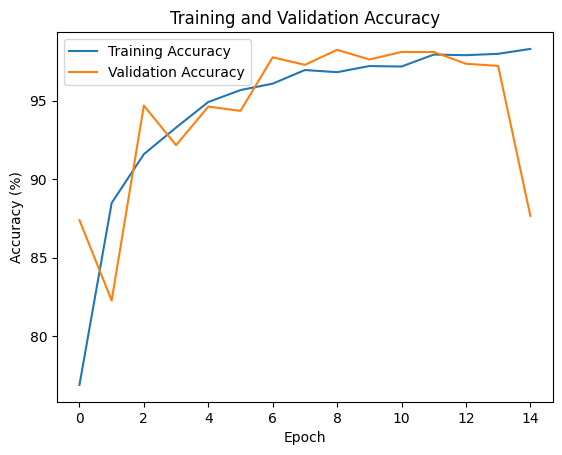

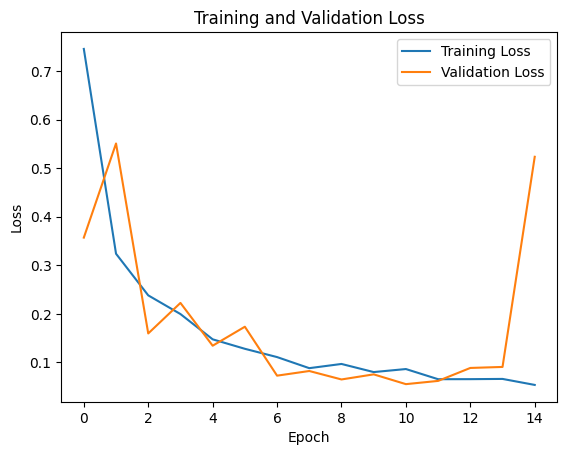

In [ ]:



# Lists to store metrics
train_accuracy_history = []
valid_accuracy_history = []
train_loss_history = []
valid_loss_history = []

# Train the model
num_epochs = 15
for epoch in range(num_epochs):
    # Training loop
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels_train = []
    predicted_labels_train = []
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels_train.extend(labels.cpu().numpy())
        predicted_labels_train.extend(predicted.cpu().numpy())
        running_loss += loss.item() * inputs.size(0)

    epoch_train_accuracy = 100 * correct / total
    epoch_train_loss = running_loss / len(train_dataset)
    train_accuracy_history.append(epoch_train_accuracy)
    train_loss_history.append(epoch_train_loss)

    # Validation loop
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    true_labels_valid = []
    predicted_labels_valid = []
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        true_labels_valid.extend(labels.cpu().numpy())
        predicted_labels_valid.extend(predicted.cpu().numpy())
        running_loss += loss.item() * inputs.size(0)

    epoch_valid_accuracy = 100 * correct / total
    epoch_valid_loss = running_loss / len(validation_dataset)
    valid_accuracy_history.append(epoch_valid_accuracy)
    valid_loss_history.append(epoch_valid_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {epoch_train_accuracy:.2f}%, Train Loss: {epoch_train_loss:.4f}, Valid Accuracy: {epoch_valid_accuracy:.2f}%, Valid Loss: {epoch_valid_loss:.4f}')

# Generate classification report for training data
train_classification_report = classification_report(true_labels_train, predicted_labels_train)

# Generate classification report for validation data
valid_classification_report = classification_report(true_labels_valid, predicted_labels_valid)

# Print classification reports
print("Training Classification Report:")
print(train_classification_report)
print("Validation Classification Report:")
print(valid_classification_report)

# Plot training and validation accuracy
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(valid_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(valid_loss_history, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:

torch.save(model.state_dict(), '/content/drive/My Drive/resnet18Dataset1_model.pth')

In [6]:
from sklearn.metrics import accuracy_score, classification_report
# Load the saved model
model = models.resnet18(weights=None)
model.load_state_dict(torch.load('/content/drive/My Drive/resnet18Dataset1_model.pth'))
model.eval()

true_labels = []
predicted_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Accuracy: 0.8957410562180579
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80       494
           1       0.99      1.00      1.00       451
           2       0.98      0.88      0.93       518
           3       0.98      0.85      0.91       484
           4       1.00      0.99      0.99       482
           5       0.64      1.00      0.78       506

    accuracy                           0.90      2935
   macro avg       0.93      0.90      0.90      2935
weighted avg       0.93      0.90      0.90      2935



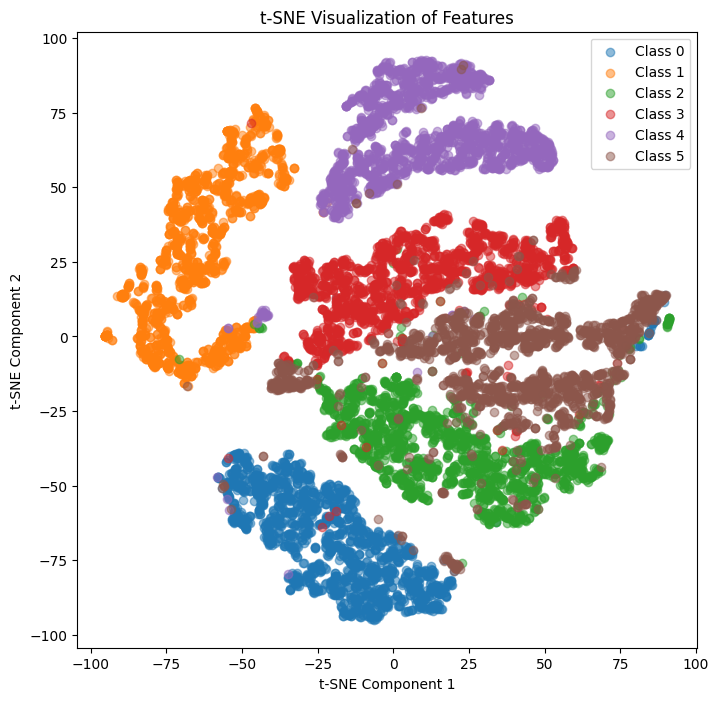

In [4]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Load the saved model
model = models.resnet18(weights=None)
model.load_state_dict(torch.load('/content/drive/My Drive/resnet18Dataset1_model.pth'))
# Get features from the penultimate layer of the model
features = []
all_labels = []
model.eval()
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        features.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

features = np.array(features)
# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)
# Plot t-SNE visualization
plt.figure(figsize=(8, 8))
for class_idx in range(len(dataset.classes)):
    plt.scatter(embedded_features[np.array(all_labels) == class_idx, 0],
                embedded_features[np.array(all_labels) == class_idx, 1],
                label=f'Class {class_idx}', alpha=0.5)
plt.title('t-SNE Visualization of Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
